# Usage Example of the HAL Project Group
## Prerequisite: 
- Importing required libraries, 
- Setting system path
- Importing HAL project

In [53]:
import os
import sys

In [54]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [55]:
sys.path.append(os.getcwd() + "/hal_pm")

In [56]:
from hal_pm import *
import datetime

## 1.) & 2.): Etablishing connection to Rest-API and requesting the data
The load_data function takes the coordinates (latitude and logitude, start and end point each) as well as a start date in `datetime` format and number of delta hours as input values. 
In first place, PM2.5 and PM10 `pandas` data frames are created seperetally. Meanwhile it creates the unique identifier column *measurement_id*, which is a combination of *sensor_id* and *time* columns in each data frame. By the unique identifier, PM2.5 and PM10 data frames are merged into a large one (since a single sensor always measures PM10 and PM2.5 values). After reordering the columns, the large data frame containing all *measurements*, *dates*, *coordinates* and *sensor_id*s is outputted to the user.

#### Place and time of measurements:
As a group, we decided to take a look at Stuttgart's fine particulate pollution in our example. This is reasoned on in the fact, that Stuttgart were famous for its ban on diesel-powered vehicles in an early stage compared to the rest of germany. Due to the fact, that one hour already contains 20134 observations, we couldn't take a longer time period into account (otherwise, loading data would take too much time). Therefore *start_date* is chosen without purpose as well. However, by only defining the datetime as *YYYY, MM, DD*, the measurements start on midnight 2018-06-01 and end on 1:00 am 2018-06-01.

In [57]:
# Load Data
start_date = datetime.datetime(2018, 6, 1)
pmdata = Load_Data.load_data(lat_start = 48.5, lat_end = 49, long_start = 9, long_end = 9.3, start_datetime = start_date, delta_hours = 1)

In [58]:
pmdata

,measurement_PM10,measurement_PM2.5,time,lat,lon,sensor_id,measurement_id
0,NaN,NaN,2018-06-01T00:00:01Z,48.798,9.070,11264,11264_2018-06-01T00:00:01Z
1,2.67,1.27,2018-06-01T00:00:01Z,48.949,9.098,122,122_2018-06-01T00:00:01Z
2,8.60,1.77,2018-06-01T00:00:01Z,48.765,9.147,4383,4383_2018-06-01T00:00:01Z
3,12.35,2.42,2018-06-01T00:00:01Z,48.779,9.034,181,181_2018-06-01T00:00:01Z
4,NaN,NaN,2018-06-01T00:00:01Z,48.779,9.034,182,182_2018-06-01T00:00:01Z
...,...,...,...,...,...,...,...
20129,3.90,1.33,2018-06-01T00:59:59Z,48.759,9.162,309,309_2018-06-01T00:59:59Z
20130,NaN,NaN,2018-06-01T00:59:59Z,48.536,9.274,202,202_2018-06-01T00:59:59Z
20131,NaN,NaN,2018-06-01T00:59:59Z,48.692,9.148,2493,2493_2018-06-01T00:59:59Z
20132,NaN,NaN,2018-06-01T00:59:59Z,48.799,9.224,5356,5356_2018-06-01T00:59:59Z


## 3.) Data Filtering

In [59]:
# Clear Data
pmdata = Filter_Data.remove_missing(pmdata)
pmdata = Filter_Data.remove_outliers(pmdata ,method = "Z-score")
print(pmdata)

9590 observations with missing values were removed from the data frame
56 outlier observations were deleted
       measurement_PM10  measurement_PM2.5                  time     lat  \
1                  2.67               1.27  2018-06-01T00:00:01Z  48.949   
2                  8.60               1.77  2018-06-01T00:00:01Z  48.765   
3                 12.35               2.42  2018-06-01T00:00:01Z  48.779   
5                  1.10               1.10  2018-06-01T00:00:01Z  48.791   
8                  5.12               2.78  2018-06-01T00:00:02Z  48.757   
...                 ...                ...                   ...     ...   
20119              5.10               1.15  2018-06-01T00:59:58Z  48.942   
20121              1.80               1.40  2018-06-01T00:59:58Z  48.870   
20124              3.23               1.80  2018-06-01T00:59:59Z  48.784   
20126             23.43              18.10  2018-06-01T00:59:59Z  48.516   
20129              3.90               1.33  2018-06-01T0

## 5.) Time histories of fine particulate pollution for the sensors with the highest and lowest mean pollution levels

The `plot_average_pol` function evaluates the *sensor_id*s with the lowest and highest average measurement per PM10/PM2.5 seperatelly. In a second steps, it takes the measurements of these sensors and plots them against a timeline. The plot is organized in subplots as following:
- **Rows**: PM10 or PM2.5 measurement
- **Columns**: sensors with average maximum (Red) or average minumum (Blue)

In case on is wondering why the average minimum time plot of PM10 measurment is a horizontal line: probably due to measurment errors, the sensor is measuring the same value all the time.

array([[<AxesSubplot:title={'center':'Pollution requested time (threshold: PM10)'}, ylabel='μg/m³'>,
        <AxesSubplot:title={'center':'Pollution requested time (threshold: PM10)'}, ylabel='μg/m³'>],
       [<AxesSubplot:title={'center':'Pollution requested time (threshold: PM2.5)'}, xlabel='Time', ylabel='μg/m³'>,
        <AxesSubplot:title={'center':'Pollution requested time (threshold: PM2.5)'}, xlabel='Time', ylabel='μg/m³'>]],
      dtype=object)

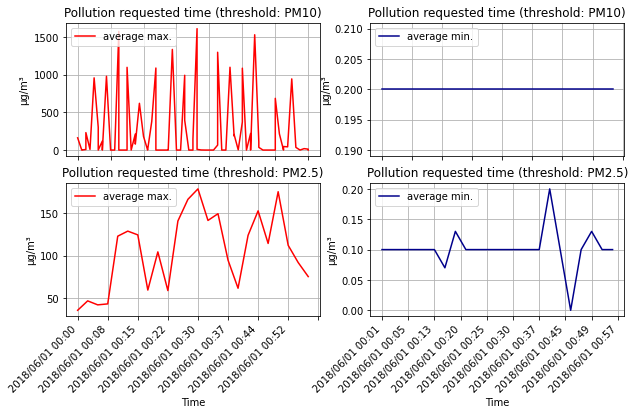

In [60]:
# Plot average polution
Time_Plots.plot_average_pol(pmdata)

In [61]:
min_PM10 = min(pmdata.groupby("sensor_id").mean()['measurement_PM10'])
min_PM10_id = pmdata.groupby("sensor_id").mean()[pmdata.groupby("sensor_id").mean()['measurement_PM10'] == min_PM10].index[0]
df_min_PM10 = pmdata.loc[pmdata['sensor_id'] == min_PM10_id]
print("Minimal Average PM10 Measurement:")
df_min_PM10

Minimal Average PM10 Measurement:


,measurement_PM10,measurement_PM2.5,time,lat,lon,sensor_id,measurement_id
542,0.2,0.2,2018-06-01T00:01:37Z,48.753,9.172,3145,3145_2018-06-01T00:01:37Z
1373,0.2,0.2,2018-06-01T00:04:03Z,48.753,9.172,3145,3145_2018-06-01T00:04:03Z
2209,0.2,0.1,2018-06-01T00:06:30Z,48.753,9.172,3145,3145_2018-06-01T00:06:30Z
3028,0.2,0.2,2018-06-01T00:08:56Z,48.753,9.172,3145,3145_2018-06-01T00:08:56Z
3850,0.2,0.1,2018-06-01T00:11:23Z,48.753,9.172,3145,3145_2018-06-01T00:11:23Z
4684,0.2,0.1,2018-06-01T00:13:50Z,48.753,9.172,3145,3145_2018-06-01T00:13:50Z
5523,0.2,0.2,2018-06-01T00:16:18Z,48.753,9.172,3145,3145_2018-06-01T00:16:18Z
6359,0.2,0.2,2018-06-01T00:18:44Z,48.753,9.172,3145,3145_2018-06-01T00:18:44Z
7201,0.2,0.2,2018-06-01T00:21:11Z,48.753,9.172,3145,3145_2018-06-01T00:21:11Z
8030,0.2,0.2,2018-06-01T00:23:37Z,48.753,9.172,3145,3145_2018-06-01T00:23:37Z
